## disturbances_2011_moja
You can find instructions to open a geoTIFF file here. Instructions on how to download and install Rasterio and GDAL(not necessary for linux) are included too.

In addition to that, we also need to install matplotlib and Shapely in order to clip the raster.

To install matplotlib and Shapely, run the commands :

```shell
pip install matplotlib
```
```shell
pip install shapely
```

Import the required libraries

In [3]:
import rasterio as rst
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

Store the geoTIFF file in a variable, use the rs.open() and show() functions to open view the image in the next cell.

We can also perform different operations using raster objects: the number of bands, the image resolution, CRS value, no-data value, number of raster bands, etc.

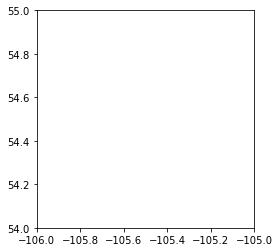

1
4000 4000
EPSG:4326
255.0


In [4]:
disturbances11 = r'disturbances_2011_moja.tiff'
img = rst.open(disturbances11)
show(img)
#No. of bands
print(img.count)

#Image resolution
print(img.height, img.width)

# CRS
print(img.crs)

# No-data
print(img.nodata)

The image has a lot of padding around the area of interest, hence we need to clip the raster. 

In [5]:
from rasterio.features import dataset_features

Finding geometry for a mask

dataset_features yields GeoJSON-like feature dictionaries for shapes found in the given band

Using this, we get the bounding box from all shapes in the output

In [7]:
geom_gen = dataset_features(img, bidx=1)
bboxes = [geom['bbox'] for geom in geom_gen]
bboxes

[[-105.871, 54.471, -105.85875, 54.47925],
 [-105.84375, 54.469, -105.82925, 54.48025]]

Next, we assign the extremums from the bounding box to different variables

In [8]:
left   = min([bbox[0] for bbox in bboxes])
bottom = min([bbox[1] for bbox in bboxes])
right  = max([bbox[2] for bbox in bboxes])
top    = max([bbox[3] for bbox in bboxes])

Create a Polygon geometry for the mask

In [9]:
from shapely.geometry import box

# create a POLYGON geometry for the mask
geom = box(left, bottom, right, top)
geom.wkt

'POLYGON ((-105.82925 54.469, -105.82925 54.48025, -105.871 54.48025, -105.871 54.469, -105.82925 54.469))'

Creating the mask

In [10]:
from rasterio.mask import mask

Assigning the data for the clipped image

In [11]:
out_image, out_transform = mask(img, [geom], crop=True, pad=True)
out_meta = img.meta

In [15]:
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rst.open(r'disturbances_2011_moja_masked.tiff', 'w', **out_meta) as dest:
    dest.write(out_image)

View the clipped raster

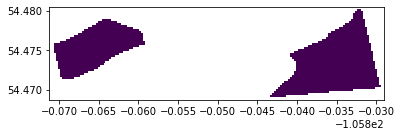

<AxesSubplot:>

In [16]:
fp_result = r'disturbances_2011_moja_masked.tiff'
result = rst.open(fp_result)
show(result)

View JSON data parsed from disturbances_2011_moja

In [18]:
import json

In [19]:
with open("disturbances_2011_moja.json") as f:
      data = json.load(f)
data

{'layer_type': 'GridLayer',
 'layer_data': 'Byte',
 'nodata': 255,
 'tileLatSize': 1.0,
 'tileLonSize': 1.0,
 'blockLatSize': 0.1,
 'blockLonSize': 0.1,
 'cellLatSize': 0.00025,
 'cellLonSize': 0.00025,
 'attributes': {'1': {'year': 2011,
   'disturbance_type': 'Wildfire',
   'transition': 1}}}